In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

8


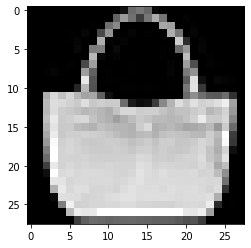

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[100],cmap='gray')
print(train_labels[100])

In [4]:
# Normalisation
train_images = train_images/255.
test_images = test_images/255.

### Original DNN

In [8]:
# Designing the model
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128,activation=tf.nn.relu),
                          keras.layers.Dense(units=10,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images,train_labels,epochs=5)
print("EVALUATION")
model.evaluate(test_images,test_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4941 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3724 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3119 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8928
EVALUATION
313/313 [==============================] - 1s 1ms/step - loss: 0.3462 - accuracy: 0.8772


[0.34616392850875854, 0.8772000074386597]

### CNN


In [10]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
# Designing the model
model = keras.Sequential([
                          keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(64,(3,3),activation='relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128,activation=tf.nn.relu),
                          keras.layers.Dense(units=10,activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images,train_labels,epochs=5)
print("EVALUATION")
model.evaluate(test_images,test_labels)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

[0.28909382224082947, 0.9034000039100647]

## Observations  
1. 64 conv filters give slighly better accuracy and loss than 32  
2. Removing last conv layer resulted in higher training acc. but lower validation acc.  